# Studying descriptive statistics stability

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import datetime
import DailyEtapasBuilder

In [3]:
date = '2017-03-01' #First date.
#Creating the object.
etapas_builder = DailyEtapasBuilder.RunSilentlyDailyEtapasBuilderClass(date)
#Building.
etapas_builder.loadSimplifiedEtapas()
etapas_builder.cleanDataFrame() #Be aware of this condition
etapas_builder.mergeTurnstileData()
etapas_builder.sortDataFrame()
etapas_builder.postProcessingSortedDataFrame()
#Retrieving the info.
etapas_df = etapas_builder.etapas_df
[filtered_df,filtered_turnstile_df, filtered_no_turnstile_df] = etapas_builder.filteringDf()

### Data Distribution

In [4]:
threshold = 120 #In seconds

time_keys = []

cumulative_counts_turnstile = []
cumulative_counts_noturnstile = []

total_count_turnstile = filtered_turnstile_df.count()[0]
total_count_noturnstile = filtered_no_turnstile_df.count()[0]

for i in range(0,threshold):
    time_keys.append(i)
    cumulative_counts_turnstile.append(filtered_turnstile_df[filtered_turnstile_df['diferencia_tiempo_secs']<i].count()[0])
    cumulative_counts_noturnstile.append(filtered_no_turnstile_df[filtered_no_turnstile_df['diferencia_tiempo_secs']<i].count()[0])


cumulative_counts_turnstile = cumulative_counts_turnstile/total_count_turnstile*100
cumulative_counts_noturnstile = cumulative_counts_noturnstile/total_count_noturnstile*100

In [5]:
count_turnstile = filtered_turnstile_df[filtered_turnstile_df['diferencia_tiempo_secs']<=threshold].count()[0]
count_noturnstile = filtered_no_turnstile_df[filtered_no_turnstile_df['diferencia_tiempo_secs']<=threshold].count()[0]


percent_turnstile = (count_turnstile/total_count_turnstile)*100
percent_noturnstile = (count_noturnstile/total_count_noturnstile)*100

print(percent_turnstile)
print(percent_noturnstile)

99.165854187
99.4831399749


In [6]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

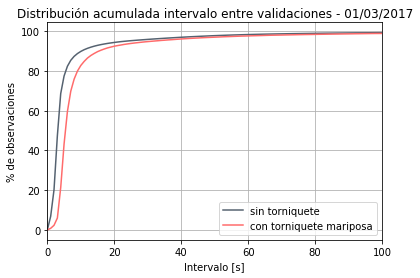

In [7]:
fig_1, ax_1 = plt.subplots()
ax_1.plot(time_keys,cumulative_counts_noturnstile,color=colors[0],label='sin torniquete')
ax_1.plot(time_keys,cumulative_counts_turnstile,color=colors[3],label='con torniquete mariposa')
ax_1.set_title('Distribución acumulada intervalo entre validaciones - 01/03/2017')
ax_1.set_xlabel('Intervalo [s]')
ax_1.set_xlim(0,100)
ax_1.set_ylabel('% de observaciones')
ax_1.legend()
ax_1.grid(True)
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/2_IntervaloVsObs_' + date + '.pdf')

### Descriptive statistics stability

In [8]:
percentiles = np.arange(0.9, 1.005, 0.005)

turnstile_mean_percentiles = []
turnstile_std_percentiles = []
turnstile_min_percentiles = []
turnstile_25_percentiles = []
turnstile_50_percentiles = []
turnstile_75_percentiles = []
turnstile_max_percentiles = []

no_turnstile_mean_percentiles = []
no_turnstile_std_percentiles = []
no_turnstile_min_percentiles = []
no_turnstile_25_percentiles = []
no_turnstile_50_percentiles = []
no_turnstile_75_percentiles = []
no_turnstile_max_percentiles = []


for i in percentiles:
    time = filtered_df['diferencia_tiempo'].quantile(i)
    percentile_df = filtered_df[filtered_df['diferencia_tiempo']<=time]
    turnstile_percentile_df = percentile_df[percentile_df['torniquete_mariposa']==1]    
    turnstile_descriptive = turnstile_percentile_df.describe()
    turnstile_mean_percentiles.append(turnstile_descriptive['diferencia_tiempo_secs'].loc['mean'])
    turnstile_std_percentiles.append(turnstile_descriptive['diferencia_tiempo_secs'].loc['std'])
    turnstile_min_percentiles.append(turnstile_descriptive['diferencia_tiempo_secs'].loc['min'])
    turnstile_25_percentiles.append(turnstile_descriptive['diferencia_tiempo_secs'].loc['25%'])
    turnstile_50_percentiles.append(turnstile_descriptive['diferencia_tiempo_secs'].loc['50%'])
    turnstile_75_percentiles.append(turnstile_descriptive['diferencia_tiempo_secs'].loc['75%'])
    turnstile_max_percentiles.append(turnstile_descriptive['diferencia_tiempo_secs'].loc['max'])
    
    no_turnstile_percentile_df = percentile_df[percentile_df['no_torniquete']==1]
    no_turnstile_descriptive = no_turnstile_percentile_df.describe()
    no_turnstile_mean_percentiles.append(no_turnstile_descriptive['diferencia_tiempo_secs'].loc['mean'])
    no_turnstile_std_percentiles.append(no_turnstile_descriptive['diferencia_tiempo_secs'].loc['std'])
    no_turnstile_min_percentiles.append(no_turnstile_descriptive['diferencia_tiempo_secs'].loc['min'])
    no_turnstile_25_percentiles.append(no_turnstile_descriptive['diferencia_tiempo_secs'].loc['25%'])
    no_turnstile_50_percentiles.append(no_turnstile_descriptive['diferencia_tiempo_secs'].loc['50%'])
    no_turnstile_75_percentiles.append(no_turnstile_descriptive['diferencia_tiempo_secs'].loc['75%'])
    no_turnstile_max_percentiles.append(no_turnstile_descriptive['diferencia_tiempo_secs'].loc['max'])


In [9]:
summary_df = pd.DataFrame({'percentile': percentiles,
                          'turnstile-mean': turnstile_mean_percentiles,
                          'turnstile-std': turnstile_std_percentiles,
                          'turnstile-median': turnstile_50_percentiles,
                          'turnstile-max': turnstile_max_percentiles,
                          'no-turnstile-mean': no_turnstile_mean_percentiles,
                          'no-turnstile-std': no_turnstile_std_percentiles,
                          'no-turnstile-median': no_turnstile_50_percentiles,
                          'no-turnstile-max': no_turnstile_max_percentiles})


In [10]:
def slope_calc(x,y):
    delta_y = (y.shift()-y)
    delta_x = (x.shift()-x)
    slope = (delta_y/delta_x).fillna(0)
    return slope


In [11]:
summary_df['difference_means'] = summary_df['turnstile-mean']-summary_df['no-turnstile-mean']

In [16]:
summary_df.loc[summary_df['difference_means']==summary_df['difference_means'].min(),['percentile','difference_means']]

,percentile,difference_means
0,0.9,2.065703


In [17]:
summary_df.loc[summary_df['difference_means']==summary_df['difference_means'].max(),['percentile','difference_means']]

,percentile,difference_means
20,1.0,3.424557


In [18]:
summary_df['turnstile-mean-slope'] = slope_calc(summary_df['percentile'],summary_df['turnstile-mean'])
summary_df['no-turnstile-mean-slope'] = slope_calc(summary_df['percentile'],summary_df['no-turnstile-mean'])

summary_df['turnstile-std-slope'] = slope_calc(summary_df['percentile'],summary_df['turnstile-std'])
summary_df['no-turnstile-std-slope'] = slope_calc(summary_df['percentile'],summary_df['no-turnstile-std'])

summary_df['turnstile-max-slope'] = slope_calc(summary_df['percentile'],summary_df['turnstile-max'])
summary_df['no-turnstile-max-slope'] = slope_calc(summary_df['percentile'],summary_df['no-turnstile-max'])


In [19]:
turnstile_mean_slope = summary_df['turnstile-mean-slope'].values
no_turnstile_mean_slope = summary_df['no-turnstile-mean-slope'].values

turnstile_std_slope = summary_df['turnstile-std-slope'].values
no_turnstile_std_slope = summary_df['no-turnstile-std-slope'].values

turnstile_max_slope = summary_df['turnstile-max-slope'].values
no_turnstile_max_slope = summary_df['no-turnstile-max-slope'].values

In [20]:
#cols = ['percentile', 
#        'turnstile-mean', 'turnstile-mean-slope' ,'no-turnstile-mean', 'no-turnstile-mean-slope',
#        'turnstile-std', 'turnstile-std-slope', 'no-turnstile-std', 'no-turnstile-std-slope',
#        'turnstile-median', 'no-turnstile-median', 
#        'turnstile-max','turnstile-max-slope', 'no-turnstile-max', 'no-turnstile-max-slope']
#summary_df = summary_df[cols]


* To LaTeX

In [21]:
#means_df = summary_df[['percentile','turnstile-mean','turnstile-mean-slope','no-turnstile-mean','no-turnstile-mean-slope']]
#stds_df = summary_df[['percentile','turnstile-std','turnstile-std-slope','no-turnstile-std','no-turnstile-std-slope']]
#maxs_df = summary_df[['percentile','turnstile-max','turnstile-max-slope','no-turnstile-max','no-turnstile-max-slope']]

In [22]:
#means_df

In [23]:
#stds_df

In [24]:
#maxs_df

* To plotting

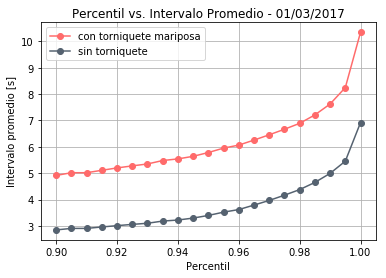

In [25]:
fig_2, ax_2 = plt.subplots()

ax_2.plot(percentiles,turnstile_mean_percentiles,'-o',color=colors[3],label='con torniquete mariposa')
ax_2.plot(percentiles,no_turnstile_mean_percentiles,'-o',color=colors[0],label='sin torniquete')

ax_2.set_title('Percentil vs. Intervalo Promedio - 01/03/2017')
ax_2.set_xlabel('Percentil')
ax_2.set_ylabel('Intervalo promedio [s]')
ax_2.legend()
ax_2.grid(True)
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/2_percentilVsPromedio_' + date + '.pdf')

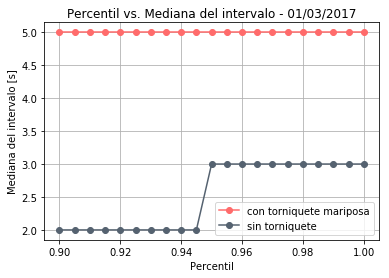

In [26]:
fig_3, ax_3 = plt.subplots()
ax_3.plot(percentiles,turnstile_50_percentiles,'-o',color=colors[3],label='con torniquete mariposa')
ax_3.plot(percentiles,no_turnstile_50_percentiles, '-o', color=colors[0], label='sin torniquete')
ax_3.legend()
ax_3.set_title('Percentil vs. Mediana del intervalo - 01/03/2017')
ax_3.set_xlabel('Percentil')
ax_3.set_ylabel('Mediana del intervalo [s]')
ax_3.grid(True)
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/2_percentilVsMediana_' + date + '.pdf')

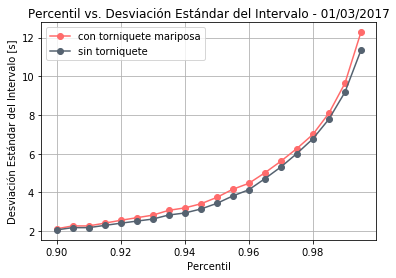

In [27]:
fig_4, ax_4 = plt.subplots()

#Filtering for plotting:
new_percentiles = percentiles[percentiles<1]
new_turnstile_std_percentiles = [x for x in turnstile_std_percentiles if x < 20]
new_no_turnstile_std_percentiles = [x for x in no_turnstile_std_percentiles if x < 20]
#End of filter.

ax_4.plot(new_percentiles,new_turnstile_std_percentiles,'-o',color=colors[3],label='con torniquete mariposa')
ax_4.plot(new_percentiles,new_no_turnstile_std_percentiles, '-o', color=colors[0], label='sin torniquete')
ax_4.legend()
ax_4.set_title('Percentil vs. Desviación Estándar del Intervalo - 01/03/2017')
ax_4.set_xlabel('Percentil')
ax_4.set_ylabel('Desviación Estándar del Intervalo [s]')
ax_4.grid(True)

plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/2_percentilVsStd_' + date + '.pdf')

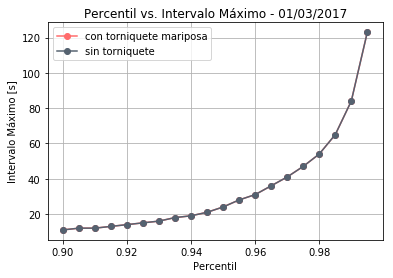

In [28]:
fig_5, ax_5 = plt.subplots()

#Filtering for plotting:
new_turnstile_max_percentiles = [x for x in turnstile_max_percentiles if x < 200]
new_no_turnstile_max_percentiles = [x for x in no_turnstile_max_percentiles if x < 200]
#End of filter.

ax_5.plot(new_percentiles,new_turnstile_max_percentiles,'-o',color=colors[3],label='con torniquete mariposa')
ax_5.plot(new_percentiles,new_no_turnstile_max_percentiles, '-o', color=colors[0], label='sin torniquete')
ax_5.legend()
ax_5.set_title('Percentil vs. Intervalo Máximo - 01/03/2017')
ax_5.set_xlabel('Percentil')
ax_5.set_ylabel('Intervalo Máximo [s]')
ax_5.grid(True)

plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/2_percentilVsMax_' + date + '.pdf')

In [29]:
summary_df['difference_stds'] = summary_df['turnstile-std']-summary_df['no-turnstile-std']

In [30]:
summary_df

,no-turnstile-max,no-turnstile-mean,no-turnstile-median,no-turnstile-std,percentile,turnstile-max,turnstile-mean,turnstile-median,turnstile-std,difference_means,turnstile-mean-slope,no-turnstile-mean-slope,turnstile-std-slope,no-turnstile-std-slope,turnstile-max-slope,no-turnstile-max-slope,difference_stds
0,11.0,2.849274,2.0,2.061967,0.900,11.0,4.914977,5.0,2.119461,2.065703,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.057494
1,12.0,2.906771,2.0,2.178952,0.905,12.0,5.017868,5.0,2.268323,2.111097,20.578260,11.499459,29.772353,23.396889,200.0,200.0,0.089372
2,12.0,2.906771,2.0,2.178952,0.910,12.0,5.017868,5.0,2.268323,2.111097,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,0.089372
3,13.0,2.960842,2.0,2.294608,0.915,13.0,5.109838,5.0,2.410741,2.148996,18.394003,10.814220,28.483614,23.131197,200.0,200.0,0.116134
4,14.0,3.011421,2.0,2.407673,0.920,14.0,5.199901,5.0,2.558391,2.188480,18.012457,10.115773,29.529960,22.613126,200.0,200.0,0.150718
5,15.0,3.058377,2.0,2.516927,0.925,15.0,5.277004,5.0,2.691385,2.218627,15.420695,9.391237,26.598831,21.850653,200.0,200.0,0.174459
6,16.0,3.101762,2.0,2.621693,0.930,16.0,5.350301,5.0,2.823940,2.248539,14.659321,8.677009,26.510981,20.953262,200.0,200.0,0.202247
7,18.0,3.184591,2.0,2.831620,0.935,18.0,5.480041,5.0,3.072842,2.295450,25.948004,16.565678,49.780392,41.985377,400.0,400.0,0.241222
8,19.0,3.223768,2.0,2.935349,0.940,19.0,5.542001,5.0,3.198899,2.318233,12.392005,7.835380,25.211350,20.745826,200.0,200.0,0.263550
9,21.0,3.298161,2.0,3.139701,0.945,21.0,5.639569,5.0,3.408172,2.341408,19.513638,14.878704,41.854679,40.870361,400.0,400.0,0.268472


In [31]:
summary_df.loc[summary_df['percentile']!=1.000,'difference_stds'].min()

0.057494242675418139

In [32]:
summary_df['difference_stds'].max()

0.93077529656107671

### Closed